
# This code does:
- Lets you listen to the EWA data 
- Extracts features from EWA wav files. 


In [4]:
%run project_setup.py 

import os
from IPython.display import Audio
import pandas as pd

from disvoice.articulation.articulation import Articulation
from disvoice.phonation.phonation import Phonation
from disvoice.prosody.prosody import Prosody


from constants import *
from functions import extend_paths, add_columns_to_dataframe

from EWA_wav_paths import ids_EWA_100

# Definitions

In [5]:
ids = ids_EWA_100

# Do choises with regards to id, utterance, utterance type, etc here to create a list of paths: 
diagnosis = [""] # DIAGNOSIS
picture = ["vokal", "akvarium"] # PICTURE
id = ["611xqj2u01"] # ID


# Importing data: 

In [6]:
# Metadata
metadata_path = os.path.join(personal_path_to_EWA_DB,'SPEAKERS.TSV')
metadata=pd.read_csv(metadata_path,sep='\t') # Get all metadata 

metadata = metadata.rename(columns={"SPEAKER_CODE": "ID"}) # Restructure IDs to be called "ID". 
metadata = metadata.loc[metadata['ID'].isin(ids)] # Extract the data with the IDs from 100 people
metadata = metadata[["ID", "DIAGNOSIS", "AGE", "SEX", "MOCA" , "WAIS", "EDUCATION_GRATUATED_SCHOOL", "EDUCATION_YEARS", "FAMILY", "COFFEE"]]

# Files info: 
files_info_path = os.path.join(personal_path_to_EWA_DB,'FILES.TSV')
files_info=pd.read_csv(files_info_path,sep='\t')

files_info = files_info.rename(columns={"SPEAKER_CODE": "ID"}) # Restructure IDs to be called "ID". 
files_info = files_info.loc[files_info['ID'].isin(ids)]  # Extract the data with the IDs from 100 people
files_info = files_info[["ID", "DIAGNOSIS", "PICTURE", "AUDIOFILE"]] # Remove columns we dont need

all_metadata = add_columns_to_dataframe(files_info, metadata, ["DIAGNOSIS", "AGE", "SEX", "MOCA", "WAIS", "EDUCATION_GRATUATED_SCHOOL", "EDUCATION_YEARS", "FAMILY", "COFFEE"])


In [7]:
all_metadata_to_use = all_metadata

# Sorting out paths based on definition: 
if picture != [""]: 
        all_metadata_to_use = all_metadata_to_use[all_metadata_to_use["PICTURE"].isin(picture)]
if diagnosis != [""]: 
        all_metadata_to_use = all_metadata_to_use[all_metadata_to_use["DIAGNOSIS"].isin(diagnosis)]
if id != [""]: 
        all_metadata_to_use = all_metadata_to_use[all_metadata_to_use["ID"].isin(id)]


In [8]:
display(all_metadata_to_use)

,ID,DIAGNOSIS,PICTURE,AUDIOFILE,AGE,SEX,MOCA,WAIS,EDUCATION_GRATUATED_SCHOOL,EDUCATION_YEARS,FAMILY,COFFEE
6194,611xqj2u01,Healthy,akvarium,./Healthy/611xqj2u01//naming/akvarium.wav,44,male,27,2,University,17,no occurrence,Yes
6258,611xqj2u01,Healthy,vokal,./Healthy/611xqj2u01//phonation/vokal.wav,44,male,27,2,University,17,no occurrence,Yes


In [9]:
paths = list(all_metadata_to_use["AUDIOFILE"])
paths = [elem[1:] for elem in paths] # Remove "." in the begining of the path. 

paths = extend_paths(paths, personal_path_to_EWA_DB)

# If only want one path: 
# paths = paths[0]

print("You now have ", len(paths), " files:")
print(paths)


You now have  2  files:
['/home/malinre/master-thesis/S0489/Healthy/611xqj2u01//naming/akvarium.wav', '/home/malinre/master-thesis/S0489/Healthy/611xqj2u01//phonation/vokal.wav']


In [10]:
for elem in paths: 
    print(elem)
    display(Audio(elem,autoplay=False)) 

/home/malinre/master-thesis/S0489/Healthy/611xqj2u01//naming/akvarium.wav


/home/malinre/master-thesis/S0489/Healthy/611xqj2u01//phonation/vokal.wav


In [11]:
# To remove "findfont: Font family 'Times New Roman' not found" error: (Changes default to one that actually is installed in /miniconda3/envs/disenv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf)
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DeJavu Serif'

# Ignore userwarning about color being not needed to be defined. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

/home/malinre/master-thesis/S0489/Healthy/611xqj2u01//naming/akvarium.wav


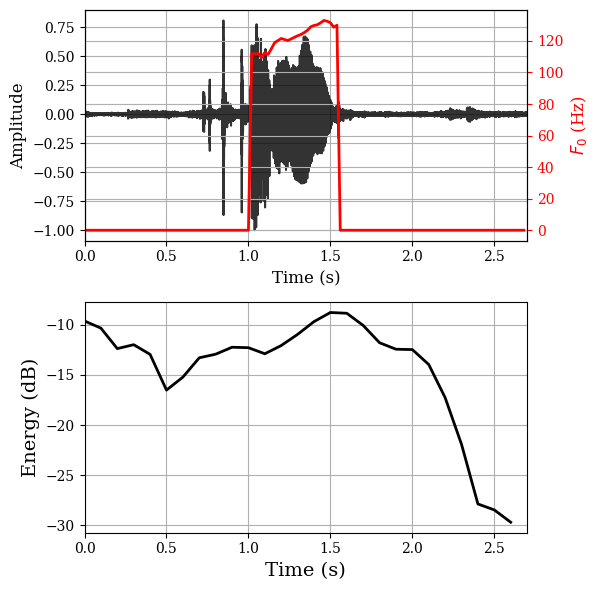

Phonation features: 


,avg DF0,avg DDF0,avg Jitter,avg Shimmer,avg apq,avg ppq,avg logE,std DF0,std DDF0,std Jitter,...,skewness apq,skewness ppq,skewness logE,kurtosis DF0,kurtosis DDF0,kurtosis Jitter,kurtosis Shimmer,kurtosis apq,kurtosis ppq,kurtosis logE
0,0.690051,0.060327,1.046226,5.447518,13.212136,0.593391,-14.405168,1.613998,2.299779,0.763915,...,0.056753,1.175537,-1.658639,0.088299,0.910235,0.235953,3.369143,-1.386402,0.438784,1.617116


/home/malinre/master-thesis/S0489/Healthy/611xqj2u01//phonation/vokal.wav


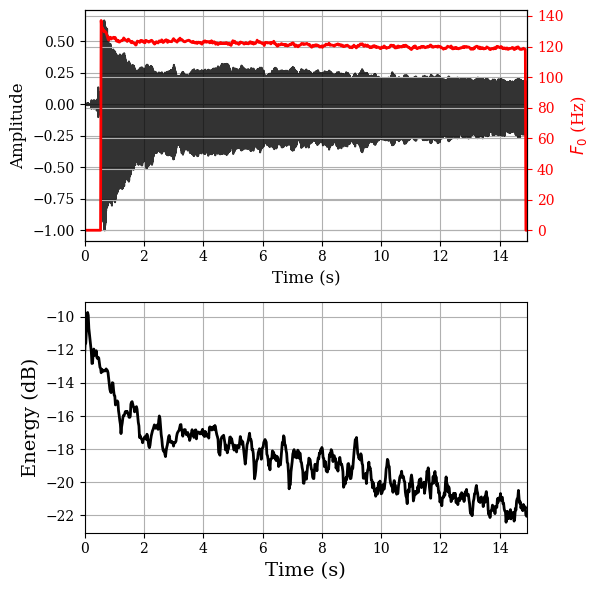

Phonation features: 


,avg DF0,avg DDF0,avg Jitter,avg Shimmer,avg apq,avg ppq,avg logE,std DF0,std DDF0,std Jitter,...,skewness apq,skewness ppq,skewness logE,kurtosis DF0,kurtosis DDF0,kurtosis Jitter,kurtosis Shimmer,kurtosis apq,kurtosis ppq,kurtosis logE
0,-0.026297,0.007134,0.306442,0.833972,3.004041,0.227832,-18.500215,0.552916,0.794202,0.262721,...,0.972472,1.008904,0.957498,8.13238,2.3239,34.031175,10.816589,1.072856,0.804786,1.199687


In [12]:
phonationf = Phonation()

for elem in paths:
    print(elem)
    features_phonation=phonationf.extract_features_file(elem, static=True, plots=True, fmt="csv") 

    print("Phonation features: ")
    display(features_phonation)

/home/malinre/master-thesis/S0489/Healthy/611xqj2u01//naming/akvarium.wav


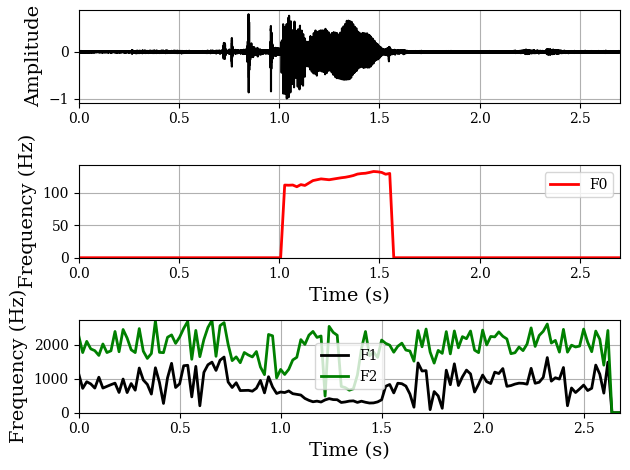

Articulation features: 


,avg BBEon_1,avg BBEon_2,avg BBEon_3,avg BBEon_4,avg BBEon_5,avg BBEon_6,avg BBEon_7,avg BBEon_8,avg BBEon_9,avg BBEon_10,...,kurtosis DDMFCCoff_9,kurtosis DDMFCCoff_10,kurtosis DDMFCCoff_11,kurtosis DDMFCCoff_12,kurtosis F1,kurtosis DF1,kurtosis DDF1,kurtosis F2,kurtosis DF2,kurtosis DDF2
0,-2.580904,-0.275161,0.446854,0.127331,0.449338,0.531383,-0.05138,-0.213967,-0.623978,-0.520137,...,0.0,0.0,0.0,0.0,-0.646619,1.932484,1.343545,0.945732,3.355037,2.276196


/home/malinre/master-thesis/S0489/Healthy/611xqj2u01//phonation/vokal.wav


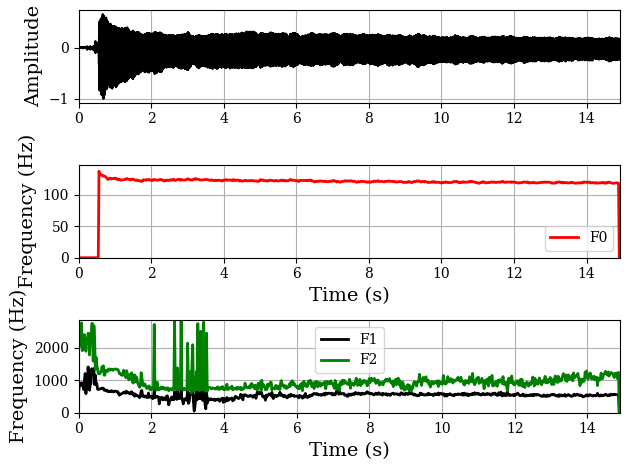

Articulation features: 


,avg BBEon_1,avg BBEon_2,avg BBEon_3,avg BBEon_4,avg BBEon_5,avg BBEon_6,avg BBEon_7,avg BBEon_8,avg BBEon_9,avg BBEon_10,...,kurtosis DDMFCCoff_9,kurtosis DDMFCCoff_10,kurtosis DDMFCCoff_11,kurtosis DDMFCCoff_12,kurtosis F1,kurtosis DF1,kurtosis DDF1,kurtosis F2,kurtosis DF2,kurtosis DDF2
0,-3.060608,-1.903778,-1.546189,-2.041217,-1.720071,-0.588299,-0.204609,-0.422625,-1.333988,-1.310006,...,0.0,0.0,0.0,0.0,16.807853,16.980644,14.749305,11.801312,23.127589,24.51745


In [13]:
articulationf=Articulation()

for elem in paths:
    print(elem) 
    ## Extract static features and return them as a df 
    features_articulation=articulationf.extract_features_file(elem, static=True, plots=True, fmt="csv")

    print("Articulation features: ")
    display(features_articulation) 
    # display(features_articulation)

/home/malinre/master-thesis/S0489/Healthy/611xqj2u01//naming/akvarium.wav


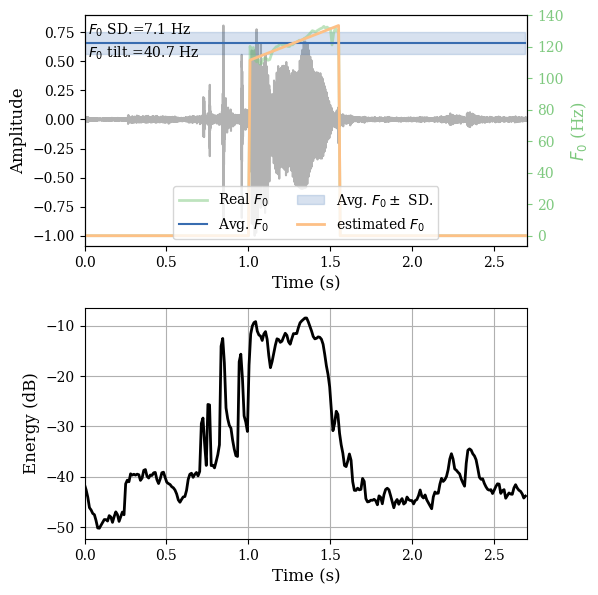

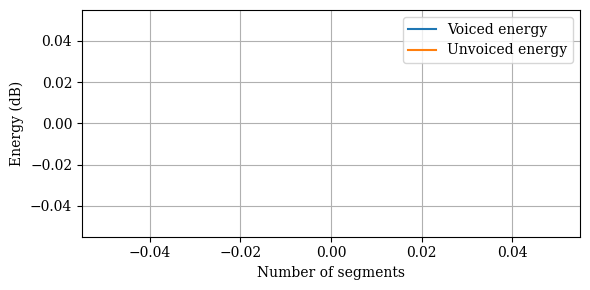

Prosodu features: 


,F0avg,F0std,F0max,F0min,F0skew,F0kurt,F0tiltavg,F0mseavg,F0tiltstd,F0msestd,...,skwdurpause,kurtosisdurpause,maxdurpause,mindurpause,PVU,PU,UVU,VVU,VP,UP
0,122.513397,7.118982,132.967667,109.046402,-0.278721,-1.044957,40.662638,9.01296,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/home/malinre/master-thesis/S0489/Healthy/611xqj2u01//phonation/vokal.wav


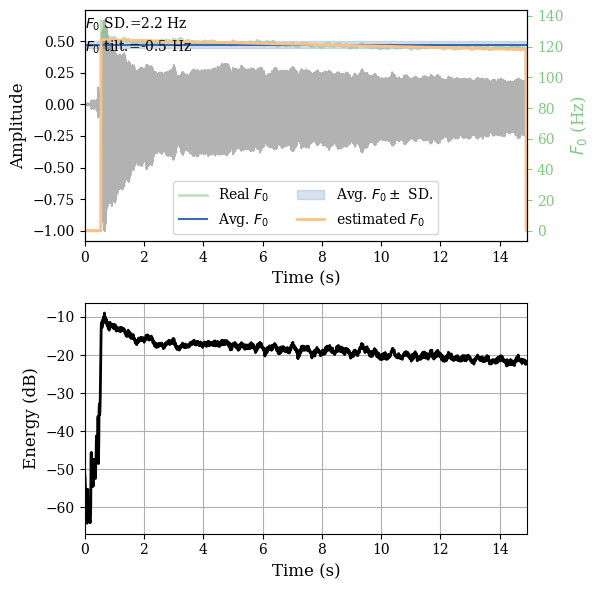

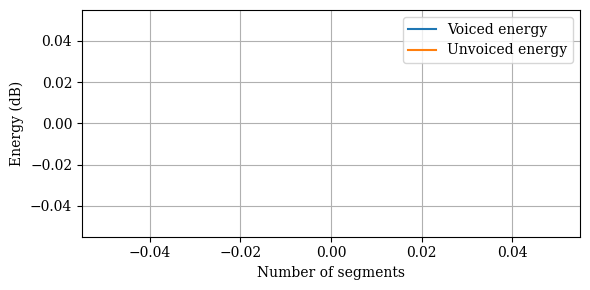

Prosodu features: 


,F0avg,F0std,F0max,F0min,F0skew,F0kurt,F0tiltavg,F0mseavg,F0tiltstd,F0msestd,...,skwdurpause,kurtosisdurpause,maxdurpause,mindurpause,PVU,PU,UVU,VVU,VP,UP
0,121.335007,2.157301,137.039841,117.654465,1.320104,4.363599,-0.452771,1.145873,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
prosodyf=Prosody()
for elem in paths:
    print(elem)
    features_prosody=prosodyf.extract_features_file(elem, static=True, plots=True, fmt="csv")

    print("Prosodu features: ")
    display(features_prosody)

